# Introducción al Aprendizaje Automático &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; UANL - FCFM
---
## Regresion logistica, KNN y DT para datos del titanic

**Alumnos**
- Ian Mauricio Saucedo Alemán &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1868954
- Enrique Andrés Chávez Martínez &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1810004

# Leer y limpiar datos

En esta seccion, leemos y limpiamos los datos del dataset titanic para su correcto uso en los modelos. 

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
df_data_train = pd.read_excel('/content/titanic_train.xlsx')

In [ ]:
df_data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.0000,NaN,S
1,740,0,3,"Nankoff, Mr. Minko",male,NaN,0,0,349218,7.8958,NaN,S
2,752,1,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.4750,E121,S
3,523,0,3,"Lahoud, Mr. Sarkis",male,NaN,0,0,2624,7.2250,NaN,C
4,265,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,NaN,Q


In [ ]:
df_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  713 non-null    int64  
 1   Survived     713 non-null    int64  
 2   Pclass       713 non-null    int64  
 3   Name         713 non-null    object 
 4   Sex          713 non-null    object 
 5   Age          572 non-null    float64
 6   SibSp        713 non-null    int64  
 7   Parch        713 non-null    int64  
 8   Ticket       713 non-null    object 
 9   Fare         713 non-null    float64
 10  Cabin        159 non-null    object 
 11  Embarked     711 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 67.0+ KB


Se puede observar que en los datos de entrenamiento se encuentran valores nulos. 

In [ ]:
df_data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            141
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          554
Embarked         2
dtype: int64

In [ ]:
df_data_train.mean()

PassengerId    443.504909
Survived         0.380084
Pclass           2.312763
Age             29.348199
SibSp            0.537167
Parch            0.394109
Fare            31.730329
dtype: float64

In [ ]:
df_data_train['Embarked'].value_counts()

S    510
C    139
Q     62
Name: Embarked, dtype: int64

Aqui nos encargamos de los valores nulos en nuestros datos, en edad se cambian por la edad de 29, la cual es el promedio de edad sin quitar nulos, esto se hace con afan de no afectar tanto a nuestros datos con este cambio. En el numero de cabina llenamos los valores nulos con un valor que hemos declarado como MV (Missing Value). En el puerto de embarque solo hay dos valores nulos, por lo que optamos por asignarlos al puerto C. 

In [ ]:
df_data_train['Age'] = df_data_train['Age'].fillna(29)
df_data_train['Cabin'] = df_data_train['Cabin'].fillna('MV')
df_data_train['Embarked'] = df_data_train['Embarked'].fillna('C')
df_data_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
df_data_test = pd.read_excel('/content/titanic_val.xlsx')

In [ ]:
df_data_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
2,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
3,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
4,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S


In [ ]:
df_data_test.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             36
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          133
Embarked         0
dtype: int64

In [ ]:
df_data_test.mean()

PassengerId    455.994382
Survived         0.398876
Pclass           2.292135
Age             31.112676
SibSp            0.466292
Parch            0.331461
Fare            34.102387
dtype: float64

Hacemos el mismo procedimiento para los datos de prueba. 

In [ ]:
df_data_test['Age'] = df_data_test['Age'].fillna(31)
df_data_test['Cabin'] = df_data_test['Cabin'].fillna('MV')
df_data_test['Embarked'] = df_data_test['Embarked'].fillna('C')
df_data_test.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

En esta parte estandarizamos nuestros datos, al: 
- Eliminar columnas que no nos serviran para la predicción 
- Otorgamos labels numericos a la columna de sexo 
- Asignamos dummies a las columnas del puerto de embarque y clase  
- Estandarizamos nuestros datos con StandarScaler 

In [ ]:
label = LabelEncoder()
scaler = StandardScaler()
def clean_titanic_data(data): 
  X = data.drop(labels=['PassengerId', 'Survived', 'Ticket', 'Cabin', 'Name'], axis = 1)
  y = data['Survived']
  X['Sex'] = label.fit_transform(X['Sex'])
  dict_sex = {x:y for x,y in enumerate(label.classes_)}
  X = pd.get_dummies(X, drop_first=True, columns=['Embarked', 'Pclass'])
  print(X.head())
  X = scaler.fit_transform(X)
  return X , y

x_train, y_train = clean_titanic_data(df_data_train)
x_test, y_test = clean_titanic_data(df_data_test)

   Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S  Pclass_2  Pclass_3
0    1  28.0      0      1  33.0000           0           1         1         0
1    1  29.0      0      0   7.8958           0           1         0         1
2    1   6.0      0      1  12.4750           0           1         0         1
3    1  29.0      0      0   7.2250           0           0         0         1
4    0  29.0      0      0   7.7500           1           0         0         1
   Sex   Age  SibSp  Parch  ...  Embarked_Q  Embarked_S  Pclass_2  Pclass_3
0    0  38.0      1      0  ...           0           0         0         0
1    0  35.0      1      0  ...           0           1         0         0
2    1  20.0      0      0  ...           0           1         0         1
3    1  19.0      3      2  ...           0           1         0         0
4    1  31.0      0      0  ...           0           1         0         1

[5 rows x 9 columns]


Podemos verificar que nuestros datos estan estandarizados

In [ ]:
x_train.mean(axis=0).round(2),x_train.var(axis=0)

(array([-0.,  0.,  0., -0.,  0.,  0., -0.,  0., -0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1.]))

# Regresion logistica con sklearn

En esta seccion hacemos la regresion logistica simple con sklearn

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score , f1_score, confusion_matrix

In [ ]:
model_logistic = LogisticRegression()
model_logistic.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = model_logistic.predict(x_test)
y_pred

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1])

Podemos observar las metricas que se obtienen con la prediccion de sklearn sin especificar algun corte

In [ ]:
#           Predicted
#           Neg  Pos   
# R  Neg   [[TN, FP ],
# e  Pos    [FN, TP]]
# a
# l

print(confusion_matrix(y_test,y_pred))
print("Accuracy: ", accuracy_score(y_test,y_pred))
print("Precision: ", precision_score(y_test,y_pred))
print("Recall: ", recall_score(y_test,y_pred))
print("F1: ", f1_score(y_test,y_pred))

[[99  8]
 [20 51]]
Accuracy:  0.8426966292134831
Precision:  0.864406779661017
Recall:  0.7183098591549296
F1:  0.7846153846153846


# Regresion logistica sklearn con cortes 

En esta seccion realizamos cortes para evaluar la regresion lineal en muchos segmentos. 

In [ ]:
y_pred_raw = model_logistic.predict_proba(x_test) 
y_pred_raw

In [ ]:
precision_list = []
accuracy_list = []
recall_list = []
f1_list = []
cut_list = []
for cut in [x/1000 for x in range(1001)]:
  y_pred_cut = [1 if x[1]>= cut else 0 for x in y_pred_raw]
  cut_list.append(cut)
  accuracy_list.append(accuracy_score(y_test,y_pred_cut))
  precision_list.append(precision_score(y_test,y_pred_cut))
  recall_list.append(recall_score(y_test,y_pred_cut))
  f1_list.append(f1_score(y_test,y_pred_cut))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
df_metrics = pd.DataFrame({'Cut':cut_list,
                           'Accuracy':accuracy_list,
                           'Recall':recall_list,
                           'Precision':precision_list,
                           'F1':f1_list})
df_metrics

,Cut,Accuracy,Recall,Precision,F1
0,0.000,0.398876,1.0,0.398876,0.570281
1,0.001,0.398876,1.0,0.398876,0.570281
2,0.002,0.398876,1.0,0.398876,0.570281
3,0.003,0.398876,1.0,0.398876,0.570281
4,0.004,0.398876,1.0,0.398876,0.570281
...,...,...,...,...,...
996,0.996,0.601124,0.0,0.000000,0.000000
997,0.997,0.601124,0.0,0.000000,0.000000
998,0.998,0.601124,0.0,0.000000,0.000000
999,0.999,0.601124,0.0,0.000000,0.000000


In [ ]:
df_metrics.query("Recall <= 0.9").sort_values(by=['Recall','Precision'],ascending=False).head(10)

In [ ]:
px.scatter(df_metrics,x='Precision',y='Recall',hover_data=['Cut'])

In [ ]:
px.scatter(df_metrics,x='Precision',y='Recall',animation_frame='Cut')

# KNN con sklearn

En esta seccion aplicamos un modelo de KNN con los datos 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Utilizaremos 3 numero de vecinos para realizar predicciones

In [ ]:
model_knn_3, model_knn_5, model_knn_10 = [KNeighborsClassifier(n_neighbors=x) for x in [3,5,10]]
model_knn_3.fit(x_train,y_train)
model_knn_5.fit(x_train,y_train)
model_knn_10.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [ ]:
y_pred_raw_3 = model_knn_3.predict_proba(x_test)
y_pred_raw_5 = model_knn_5.predict_proba(x_test)
y_pred_raw_10 = model_knn_10.predict_proba(x_test)

In [ ]:
def cuts(y_pred_raw): 
  precision_list = []
  accuracy_list = []
  recall_list = []
  f1_list = []
  cut_list = []
  for cut in [x/1000 for x in range(1001)]:
    y_pred = [1 if x[1]>= cut else 0 for x in y_pred_raw]
    cut_list.append(cut)
    accuracy_list.append(accuracy_score(y_test,y_pred))
    precision_list.append(precision_score(y_test,y_pred))
    recall_list.append(recall_score(y_test,y_pred))
    f1_list.append(f1_score(y_test,y_pred))
  df_metrics = pd.DataFrame({'Cut':cut_list,
                           'Accuracy':accuracy_list,
                           'Recall':recall_list,
                           'Precision':precision_list,
                           'F1':f1_list})
  return df_metrics

df_metrics_knn3 = cuts(y_pred_raw_3)
df_metrics_knn5 = cuts(y_pred_raw_5)
df_metrics_knn10 = cuts(y_pred_raw_10)

In [ ]:
df_metrics_knn3.query("Recall <= 0.9").sort_values(by=['Recall','Precision'],ascending=False).head(10)

,Cut,Accuracy,Recall,Precision,F1
1,0.001,0.691011,0.830986,0.578431,0.682081
2,0.002,0.691011,0.830986,0.578431,0.682081
3,0.003,0.691011,0.830986,0.578431,0.682081
4,0.004,0.691011,0.830986,0.578431,0.682081
5,0.005,0.691011,0.830986,0.578431,0.682081
6,0.006,0.691011,0.830986,0.578431,0.682081
7,0.007,0.691011,0.830986,0.578431,0.682081
8,0.008,0.691011,0.830986,0.578431,0.682081
9,0.009,0.691011,0.830986,0.578431,0.682081
10,0.010,0.691011,0.830986,0.578431,0.682081


In [ ]:
df_metrics_knn5.query("Recall <= 0.9").sort_values(by=['Recall','Precision'],ascending=False).head(10)

,Cut,Accuracy,Recall,Precision,F1
201,0.201,0.780899,0.774648,0.705128,0.738255
202,0.202,0.780899,0.774648,0.705128,0.738255
203,0.203,0.780899,0.774648,0.705128,0.738255
204,0.204,0.780899,0.774648,0.705128,0.738255
205,0.205,0.780899,0.774648,0.705128,0.738255
206,0.206,0.780899,0.774648,0.705128,0.738255
207,0.207,0.780899,0.774648,0.705128,0.738255
208,0.208,0.780899,0.774648,0.705128,0.738255
209,0.209,0.780899,0.774648,0.705128,0.738255
210,0.210,0.780899,0.774648,0.705128,0.738255


In [ ]:
df_metrics_knn10.query("Recall <= 0.9").sort_values(by=['Recall','Precision'],ascending=False).head(10)

,Cut,Accuracy,Recall,Precision,F1
301,0.301,0.797753,0.788732,0.727273,0.756757
302,0.302,0.797753,0.788732,0.727273,0.756757
303,0.303,0.797753,0.788732,0.727273,0.756757
304,0.304,0.797753,0.788732,0.727273,0.756757
305,0.305,0.797753,0.788732,0.727273,0.756757
306,0.306,0.797753,0.788732,0.727273,0.756757
307,0.307,0.797753,0.788732,0.727273,0.756757
308,0.308,0.797753,0.788732,0.727273,0.756757
309,0.309,0.797753,0.788732,0.727273,0.756757
310,0.310,0.797753,0.788732,0.727273,0.756757


# Decision Trees con sklearn

En esta seccion aplicamos un modelo de DT para los datos

In [ ]:
from sklearn.tree import DecisionTreeClassifier

Utilizaremos 3 valores para la profundidad maxima de nuestros modelos, 3, 4 y 6

In [ ]:
model_dt_3, model_dt_4, model_dt_6 = [DecisionTreeClassifier(max_depth= x) for x in [3,4,6]]
model_dt_3.fit(x_train,y_train)
model_dt_4.fit(x_train,y_train)
model_dt_6.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
from sklearn.tree import plot_tree

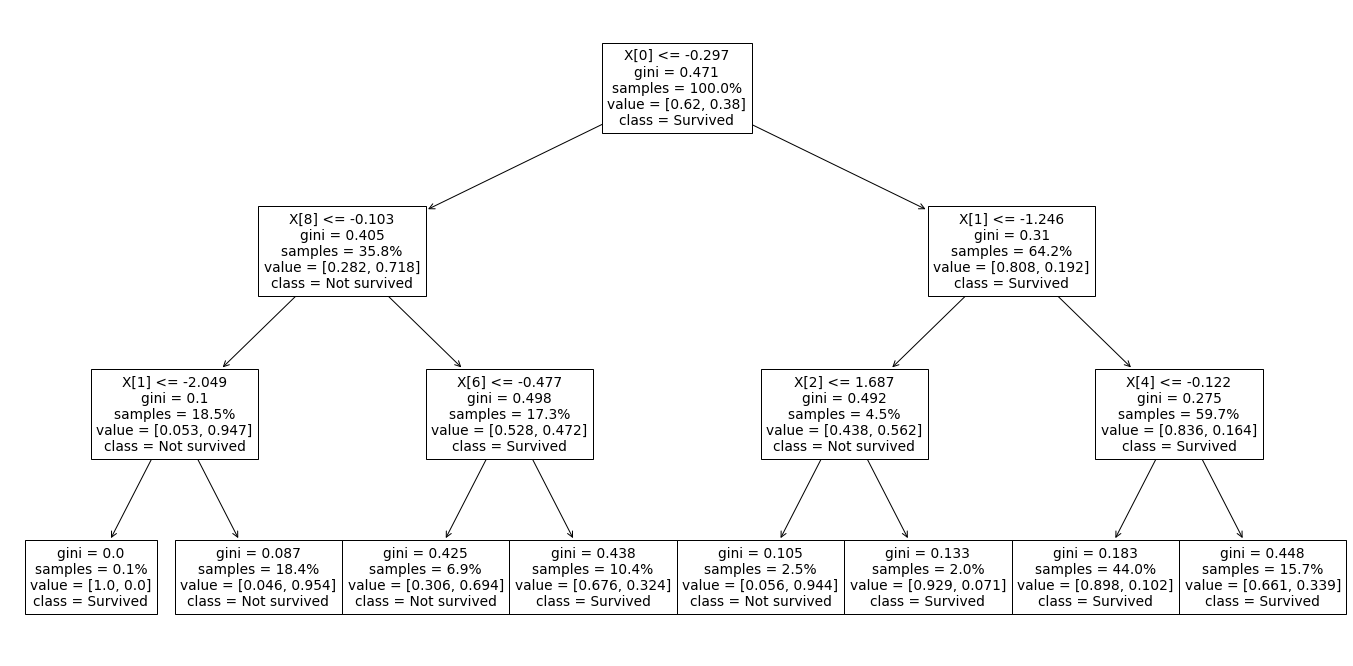

In [ ]:
plt.figure(figsize=(24,12))
plot_tree(model_dt_3,max_depth=3,class_names =['Survived', 'Not survived'],filled=False,
          impurity = True,proportion = True)
plt.show()

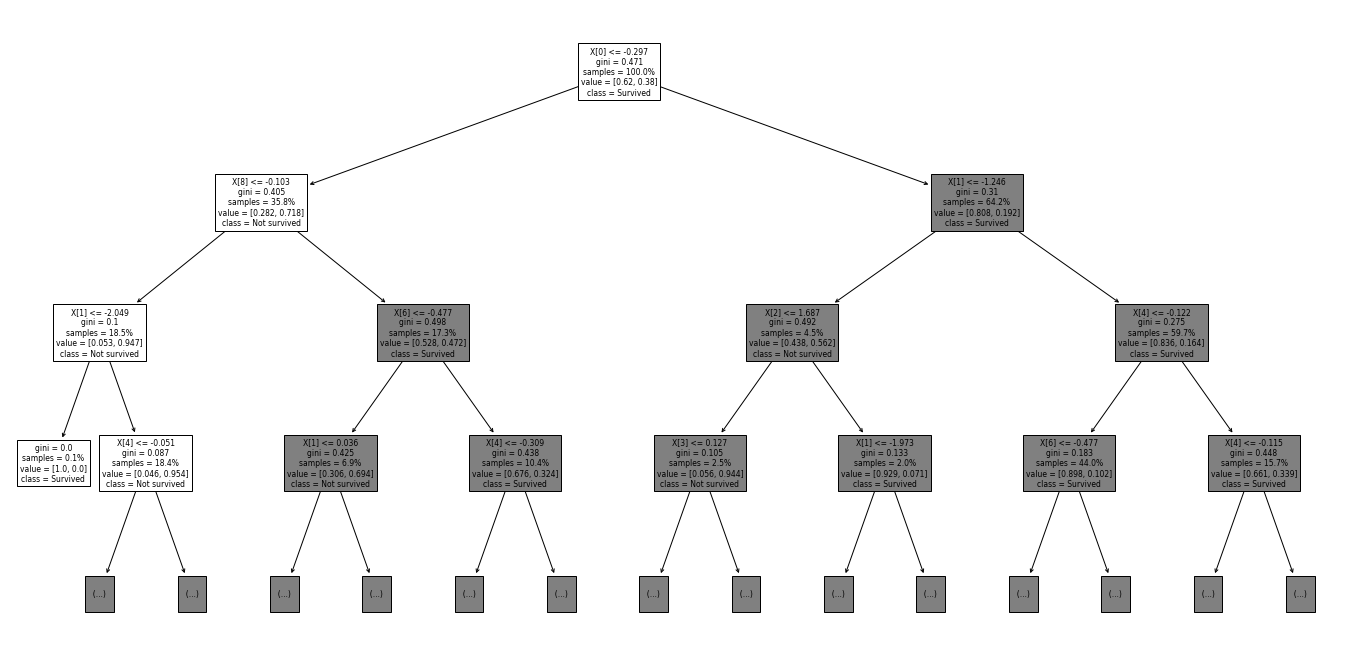

In [ ]:
plt.figure(figsize=(24,12))
plot_tree(model_dt_4,max_depth=3,class_names =['Survived', 'Not survived'],filled=False,
          impurity = True,proportion = True)
plt.show()

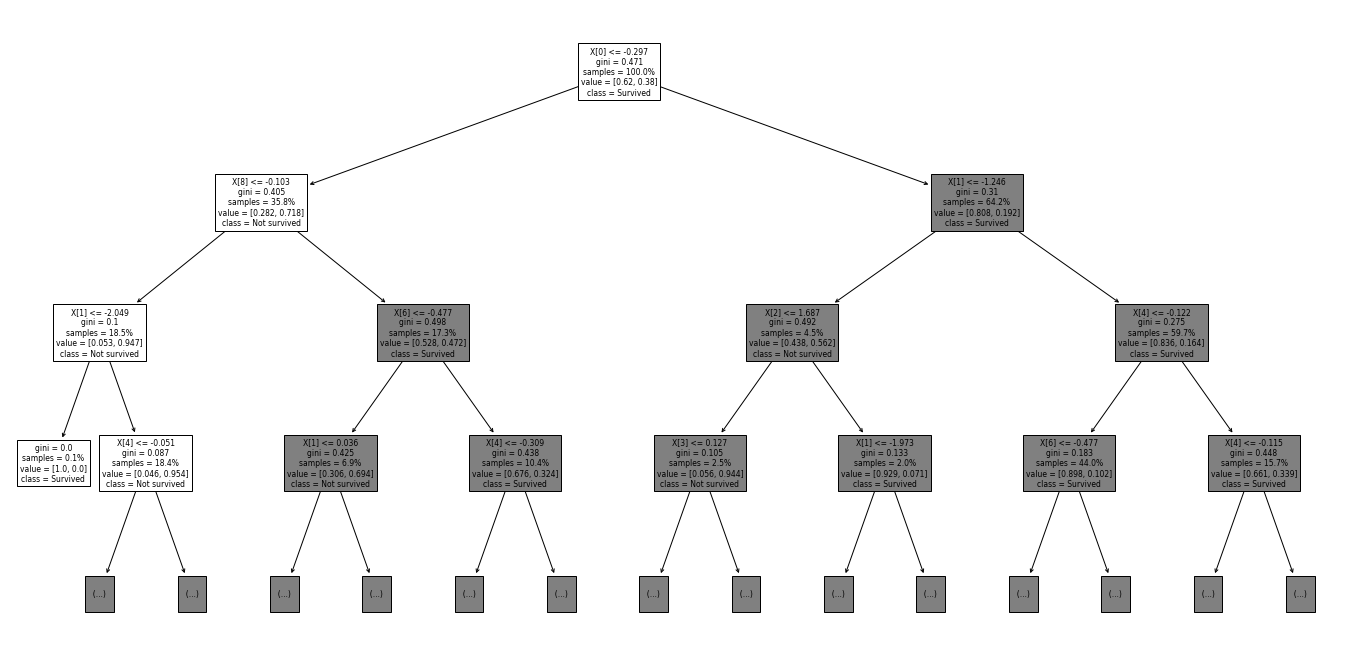

In [ ]:
plt.figure(figsize=(24,12))
plot_tree(model_dt_6,max_depth=3,class_names =['Survived', 'Not survived'],filled=False,
          impurity = True,proportion = True)
plt.show()

In [ ]:
y_pred_raw_3 = model_dt_3.predict_proba(x_test)
y_pred_raw_4 = model_dt_4.predict_proba(x_test)
y_pred_raw_6 = model_dt_6.predict_proba(x_test)

In [ ]:
df_metrics_dt3 = cuts(y_pred_raw_3)
df_metrics_dt4 = cuts(y_pred_raw_4)
df_metrics_dt6 = cuts(y_pred_raw_6)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
df_metrics_dt3.query("Recall <= 0.9").sort_values(by=['Recall','Precision'],ascending=False).head(10)

,Cut,Accuracy,Recall,Precision,F1
102,0.102,0.786517,0.84507,0.689655,0.759494
103,0.103,0.786517,0.84507,0.689655,0.759494
104,0.104,0.786517,0.84507,0.689655,0.759494
105,0.105,0.786517,0.84507,0.689655,0.759494
106,0.106,0.786517,0.84507,0.689655,0.759494
107,0.107,0.786517,0.84507,0.689655,0.759494
108,0.108,0.786517,0.84507,0.689655,0.759494
109,0.109,0.786517,0.84507,0.689655,0.759494
110,0.110,0.786517,0.84507,0.689655,0.759494
111,0.111,0.786517,0.84507,0.689655,0.759494


In [ ]:
df_metrics_dt4.query("Recall <= 0.9").sort_values(by=['Recall','Precision'],ascending=False).head(10)

,Cut,Accuracy,Recall,Precision,F1
85,0.085,0.707865,0.859155,0.592233,0.701149
86,0.086,0.707865,0.859155,0.592233,0.701149
87,0.087,0.707865,0.859155,0.592233,0.701149
88,0.088,0.707865,0.859155,0.592233,0.701149
89,0.089,0.707865,0.859155,0.592233,0.701149
90,0.090,0.707865,0.859155,0.592233,0.701149
91,0.091,0.707865,0.859155,0.592233,0.701149
92,0.092,0.707865,0.859155,0.592233,0.701149
93,0.093,0.707865,0.859155,0.592233,0.701149
94,0.094,0.707865,0.859155,0.592233,0.701149


In [ ]:
df_metrics_dt6.query("Recall <= 0.9").sort_values(by=['Recall','Precision'],ascending=False).head(10)

,Cut,Accuracy,Recall,Precision,F1
1,0.001,0.494382,0.873239,0.433566,0.579439
2,0.002,0.494382,0.873239,0.433566,0.579439
3,0.003,0.494382,0.873239,0.433566,0.579439
4,0.004,0.494382,0.873239,0.433566,0.579439
5,0.005,0.494382,0.873239,0.433566,0.579439
6,0.006,0.494382,0.873239,0.433566,0.579439
7,0.007,0.494382,0.873239,0.433566,0.579439
8,0.008,0.494382,0.873239,0.433566,0.579439
9,0.009,0.494382,0.873239,0.433566,0.579439
10,0.010,0.494382,0.873239,0.433566,0.579439
